In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
import statsmodels.api as sm 
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV

### Problem 01 - Company Data
A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  


#### A. Import Data

In [86]:
data_1 = pd.read_csv('Company_Data.csv')
data_1

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


#### B. Data Understanding

In [87]:
data_1.shape

(400, 11)

In [88]:
data_1.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [89]:
data_1.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

In [90]:
data_1.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [91]:
# From the Targeted column Sales. we can observe mean and median is 7.49, so the threshold is 7.49.

#### C. Data Preparation

In [92]:
data_1["sales"]="small"
data_1

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,small
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,small
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,small
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,small
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,small
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes,small
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes,small
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes,small
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes,small


In [93]:
data_1.loc[data_1["Sales"]>7.49,"sales"]="large"
data_1

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,large
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,large
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,large
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,small
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,small
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes,large
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes,small
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes,small
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes,small


In [94]:
data_1.drop(["Sales"],axis=1,inplace=True)

In [95]:
data_1 = pd.get_dummies(data_1, columns = ['ShelveLoc','US','Urban'])

In [96]:
data_1

,CompPrice,Income,Advertising,Population,Price,Age,Education,sales,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,US_No,US_Yes,Urban_No,Urban_Yes
0,138,73,11,276,120,42,17,large,1,0,0,0,1,0,1
1,111,48,16,260,83,65,10,large,0,1,0,0,1,0,1
2,113,35,10,269,80,59,12,large,0,0,1,0,1,0,1
3,117,100,4,466,97,55,14,small,0,0,1,0,1,0,1
4,141,64,3,340,128,38,13,small,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,33,14,large,0,1,0,0,1,0,1
396,139,23,3,37,120,55,11,small,0,0,1,0,1,1,0
397,162,26,12,368,159,40,18,small,0,0,1,0,1,0,1
398,100,79,7,284,95,50,12,small,1,0,0,0,1,0,1


In [97]:
X = data_1.drop(labels='sales',axis=1)
y = data_1[['sales']]

In [98]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.20,random_state=12,shuffle=True)

In [99]:
X_train.shape,y_train.shape

((320, 14), (320, 1))

In [100]:
X_train

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,US_No,US_Yes,Urban_No,Urban_Yes
199,122,88,5,335,126,64,14,0,0,1,0,1,0,1
43,123,42,11,16,134,59,13,0,0,1,0,1,0,1
307,138,92,0,13,120,61,12,1,0,0,1,0,0,1
166,119,67,17,151,137,55,11,0,0,1,0,1,0,1
64,100,67,12,184,104,32,16,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,136,63,0,160,94,38,12,0,0,1,1,0,0,1
253,124,24,5,288,122,57,12,0,0,1,0,1,1,0
390,108,75,9,61,111,67,12,0,0,1,0,1,0,1
155,98,72,0,59,69,65,16,0,0,1,1,0,0,1


In [101]:
X_train.dtypes

CompPrice           int64
Income              int64
Advertising         int64
Population          int64
Price               int64
Age                 int64
Education           int64
ShelveLoc_Bad       uint8
ShelveLoc_Good      uint8
ShelveLoc_Medium    uint8
US_No               uint8
US_Yes              uint8
Urban_No            uint8
Urban_Yes           uint8
dtype: object

In [102]:
y_train

,sales
199,small
43,small
307,small
166,small
64,large
...,...
241,large
253,small
390,small
155,large


#### D.Model Building

In [125]:
dt_model_1 = DecisionTreeClassifier()

In [121]:
dt_model_1.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

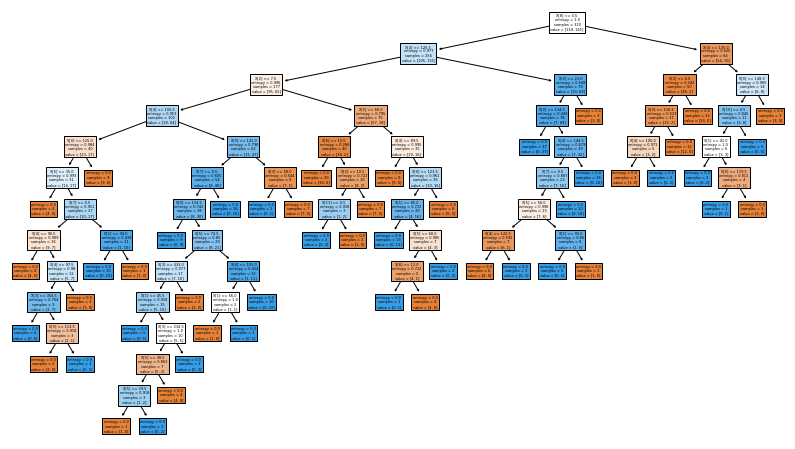

In [122]:
plt.figure(figsize=(14,8))
plot_tree(decision_tree = dt_model_1, filled=True)
plt.show()

In [123]:
y_train_pred = dt_model_1.predict(X_train)

In [124]:
print(accuracy_score(y_train,y_train_pred))

1.0


In [111]:
print('Classification Report:\n',classification_report(y_train,y_train_pred))

Classification Report:
               precision    recall  f1-score   support

       large       1.00      1.00      1.00       159
       small       1.00      1.00      1.00       161

    accuracy                           1.00       320
   macro avg       1.00      1.00      1.00       320
weighted avg       1.00      1.00      1.00       320



In [114]:
print('Confusion Matrix:\n',confusion_matrix(y_train,y_train_pred))

Confusion Matrix:
 [[159   0]
 [  0 161]]


In [116]:
y_test_pred = dt_model_1.predict(X_test)

In [117]:
print(accuracy_score(y_test,y_test_pred))

0.8


In [118]:
print('Classification Report:\n',classification_report(y_test,y_test_pred))

Classification Report:
               precision    recall  f1-score   support

       large       0.83      0.75      0.79        40
       small       0.77      0.85      0.81        40

    accuracy                           0.80        80
   macro avg       0.80      0.80      0.80        80
weighted avg       0.80      0.80      0.80        80



In [119]:
print('Confusion Matrix:\n',confusion_matrix(y_test,y_test_pred))

Confusion Matrix:
 [[30 10]
 [ 6 34]]


#### from above we can observe that training accuracy is 100% while test accuracy is 80 %. 
#### Model is clearly overfitted we can tackle this over fitting problem by using GridSearchCV.

In [144]:
grid_search = GridSearchCV(estimator = dt_model_1,
                           param_grid = {'criterion':['entropy','gini'],
                                         'max_depth':[2,3,4,5,6,7,8,9,10]},
                           cv=5)
grid_search.fit(X_train,y_train)
print(grid_search.best_params_)
print(grid_search.best_score_)

{'criterion': 'entropy', 'max_depth': 8}
0.753125


In [154]:
dt_model_2 = DecisionTreeClassifier(criterion='entropy', max_depth=8)

In [155]:
dt_model_2.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8)

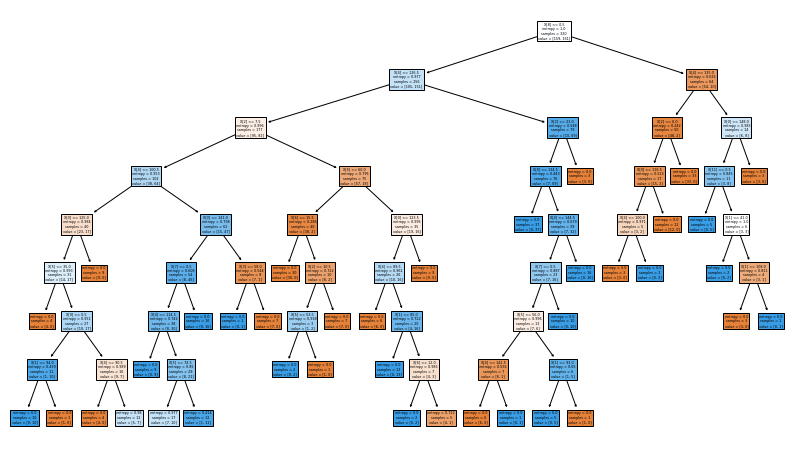

In [156]:
plt.figure(figsize=(14,8))
plot_tree(decision_tree = dt_model_2, filled=True)
plt.show()

In [157]:
y_train_pred_2 = dt_model_2.predict(X_train)

In [158]:
print(accuracy_score(y_train,y_train_pred_2))

print('Classification Report:\n',classification_report(y_train,y_train_pred_2))

print('Confusion Matrix:\n',confusion_matrix(y_train,y_train_pred_2))

0.95625
Classification Report:
               precision    recall  f1-score   support

       large       0.99      0.92      0.95       159
       small       0.92      0.99      0.96       161

    accuracy                           0.96       320
   macro avg       0.96      0.96      0.96       320
weighted avg       0.96      0.96      0.96       320

Confusion Matrix:
 [[146  13]
 [  1 160]]


In [159]:
y_test_pred_2 = dt_model_2.predict(X_test)

In [160]:
print(accuracy_score(y_test,y_test_pred_2))

0.825


In [161]:
print('Classification Report:\n',classification_report(y_test,y_test_pred_2))

Classification Report:
               precision    recall  f1-score   support

       large       0.84      0.80      0.82        40
       small       0.81      0.85      0.83        40

    accuracy                           0.82        80
   macro avg       0.83      0.82      0.82        80
weighted avg       0.83      0.82      0.82        80



In [162]:
        print('Confusion Matrix:\n',confusion_matrix(y_test,y_test_pred_2))

Confusion Matrix:
 [[32  8]
 [ 6 34]]


### E. Output Interpretetion

#####  From dt_model_1 (original Model) -
 Hyperparameters - Criteria = gini and max depth = 13
 we can observe that the Training accuracy is 100% while testing accuracy is 80%.
 Less Bias and more Variance, Which states model is overfitted.
 
##### To overcome the overfitting we can use prooning techinique and Grid Search Cv to avoing complete growth of the DecCriteria ision Tree.
##### From dt_model_2 (Model after Gred Search CV optimization)
 Criteria = entropy and max depth = 8
 we can observe that the Training accuracy is 95.6% while testing accuracy is 82.5%.
 Overfitting problem is reduced slightly.